In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi4.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = minMaxScaling(data[scanners])

In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,1264.000000,2194.000000,1506.000000,1643.000000,1736.000000,2635.000000,2792.000000,1299.000000,4569.000000,649.000000,2615.000000,1806.000000,1884.000000,993.000000,2191.000000,1924.000000,1472.000000
mean,0.324855,0.452385,0.389232,0.346166,0.452851,0.479266,0.464518,0.276341,0.440151,0.195326,0.439879,0.479642,0.511748,0.174555,0.458086,0.317897,0.295652
std,0.130288,0.110810,0.111287,0.119266,0.114845,0.126259,0.139811,0.100747,0.188901,0.098163,0.159721,0.146675,0.138114,0.069845,0.142245,0.129125,0.103917
min,0.050000,0.066667,0.066667,0.033333,0.066667,0.033333,0.050000,0.050000,0.066667,0.033333,0.033333,0.066667,0.100000,0.033333,0.050000,0.050000,0.033333
25%,0.216667,0.383333,0.300000,0.266667,0.383333,0.400000,0.366667,0.216667,0.300000,0.116667,0.316667,0.366667,0.416667,0.116667,0.350000,0.216667,0.216667
50%,0.316667,0.466667,0.400000,0.333333,0.466667,0.483333,0.483333,0.266667,0.416667,0.183333,0.450000,0.466667,0.500000,0.183333,0.466667,0.316667,0.300000
75%,0.416667,0.566667,0.483333,0.433333,0.550000,0.566667,0.583333,0.350000,0.533333,0.283333,0.550000,0.583333,0.633333,0.216667,0.550000,0.416667,0.383333
max,0.600000,0.616667,0.600000,0.583333,0.683333,0.750000,0.783333,0.483333,0.850000,0.433333,0.800000,0.750000,0.766667,0.366667,0.733333,0.566667,0.500000


## Train Validation Test Split

In [7]:
train, validation, test = train_validation_test_split(data)

In [8]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_11,55,71,68,96,126,82,60,105,120,49,48,130,129,27,45,20,84
V1_12,67,76,43,84,79,76,56,58,153,51,74,151,126,79,106,56,71
V1_13,60,141,47,111,42,86,101,111,229,13,33,107,80,92,150,14,63
V1_14,36,154,45,82,56,89,261,66,210,14,105,50,78,83,164,63,86
V1_20,105,92,94,77,124,98,61,82,72,31,72,90,169,15,74,23,69
V1_21,64,132,78,72,90,90,120,52,132,17,86,93,78,64,85,70,62
V1_22,61,70,58,62,68,155,205,27,233,27,136,57,49,11,109,90,51
V1_23,57,86,53,47,35,202,123,46,290,31,194,58,79,9,107,116,61
V1_24,22,67,53,55,39,108,95,47,441,17,184,54,64,33,87,135,26


In [9]:
train.shape

(18102, 19)

In [10]:
validation.shape

(6034, 19)

In [11]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [12]:
train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [13]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_11,24304,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_11,24306,NaN,NaN,NaN,0.55,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_11,24307,NaN,NaN,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_11,24308,NaN,0.333333,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V1_11,24310,NaN,0.333333,NaN,0.55,0.516667,0.15,0.333333,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,V1_32,22547,0.183333,0.283333,0.333333,NaN,NaN,0.55,0.433333,NaN,0.516667,NaN,0.700000,0.25,NaN,NaN,0.258333,NaN,NaN
18098,V1_32,22549,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.500000,NaN,0.700000,0.25,0.3,NaN,0.258333,NaN,NaN
18099,V1_32,22551,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.505556,NaN,0.700000,NaN,0.3,NaN,0.258333,NaN,NaN
18100,V1_32,22552,0.183333,0.283333,0.333333,NaN,0.233333,NaN,0.433333,NaN,0.505556,NaN,0.679167,NaN,0.3,NaN,0.258333,NaN,NaN


## Imputation
1. Forward fill
2. Fill NaN

In [14]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [15]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [16]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [17]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [18]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [19]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

## Model Training

In [20]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [21]:
model = MLP(size='small')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 18102 samples, validate on 6034 samples
Epoch 1/1000
18102/18102 [==============================] - 1s 65us/sample - loss: 105.2131 - mae: 7.2077 - mse: 99.9140 - val_loss: 27.9087 - val_mae: 3.3286 - val_mse: 18.2302
Epoch 2/1000
18102/18102 [==============================] - 1s 38us/sample - loss: 18.6432 - mae: 2.2535 - mse: 8.1658 - val_loss: 17.0324 - val_mae: 1.9625 - val_mse: 6.6167
Epoch 3/1000
18102/18102 [==============================] - 1s 42us/sample - loss: 14.9977 - mae: 1.6252 - mse: 4.2150 - val_loss: 15.4219 - val_mae: 1.6206 - val_mse: 4.7226
Epoch 4/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 13.9741 - mae: 1.3618 - mse: 3.0612 - val_loss: 14.7524 - val_mae: 1.4714 - val_mse: 3.9442
Epoch 5/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 13.6262 - mae: 1.2636 - mse: 2.6465 - val_loss: 14.3004 - val_mae: 1.3632 - val_mse: 3.3207
Epoch 6/1000
18102/18102 [==============================] - 1s 31us/sampl

18102/18102 [==============================] - 1s 32us/sample - loss: 12.4497 - mae: 0.9474 - mse: 1.5362 - val_loss: 13.0780 - val_mae: 1.0350 - val_mse: 1.9571
Epoch 48/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 12.4426 - mae: 0.9450 - mse: 1.5285 - val_loss: 13.0940 - val_mae: 1.1034 - val_mse: 2.1836
Epoch 49/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.4371 - mae: 0.9441 - mse: 1.5255 - val_loss: 13.0548 - val_mae: 1.0454 - val_mse: 1.9795
Epoch 50/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.4294 - mae: 0.9421 - mse: 1.5186 - val_loss: 13.0463 - val_mae: 1.0719 - val_mse: 2.0501
Epoch 51/1000
18102/18102 [==============================] - 1s 33us/sample - loss: 12.4223 - mae: 0.9411 - mse: 1.5138 - val_loss: 13.0457 - val_mae: 1.1001 - val_mse: 2.1417
Epoch 52/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.4160 - mae: 0.9382 - mse: 1.5078 - val_loss: 13

18102/18102 [==============================] - 1s 31us/sample - loss: 12.2448 - mae: 0.9026 - mse: 1.3786 - val_loss: 12.9034 - val_mae: 0.9874 - val_mse: 1.8187
Epoch 94/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.2422 - mae: 0.9007 - mse: 1.3744 - val_loss: 12.8742 - val_mae: 1.0429 - val_mse: 1.9580
Epoch 95/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.2376 - mae: 0.8999 - mse: 1.3703 - val_loss: 12.8661 - val_mae: 1.0441 - val_mse: 1.9561
Epoch 96/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.2356 - mae: 0.8999 - mse: 1.3701 - val_loss: 12.8624 - val_mae: 1.0547 - val_mse: 1.9814
Epoch 97/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.2323 - mae: 0.8996 - mse: 1.3688 - val_loss: 12.8752 - val_mae: 1.0414 - val_mse: 1.9720
Epoch 98/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.2302 - mae: 0.8985 - mse: 1.3662 - val_loss: 12

18102/18102 [==============================] - 1s 31us/sample - loss: 12.1346 - mae: 0.8729 - mse: 1.2856 - val_loss: 12.7713 - val_mae: 0.9686 - val_mse: 1.7270
Epoch 140/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.1320 - mae: 0.8715 - mse: 1.2817 - val_loss: 12.7691 - val_mae: 1.0825 - val_mse: 2.0346
Epoch 141/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.1304 - mae: 0.8728 - mse: 1.2829 - val_loss: 12.7482 - val_mae: 0.9961 - val_mse: 1.8177
Epoch 142/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.1294 - mae: 0.8710 - mse: 1.2817 - val_loss: 12.7590 - val_mae: 1.0139 - val_mse: 1.8679
Epoch 143/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.1282 - mae: 0.8716 - mse: 1.2799 - val_loss: 12.7645 - val_mae: 0.9943 - val_mse: 1.8221
Epoch 144/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.1253 - mae: 0.8708 - mse: 1.2770 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 12.0626 - mae: 0.8535 - mse: 1.2219 - val_loss: 12.6764 - val_mae: 1.0384 - val_mse: 1.9012
Epoch 186/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.0612 - mae: 0.8528 - mse: 1.2228 - val_loss: 12.6654 - val_mae: 1.0047 - val_mse: 1.8013
Epoch 187/1000
18102/18102 [==============================] - 1s 33us/sample - loss: 12.0602 - mae: 0.8526 - mse: 1.2197 - val_loss: 12.6721 - val_mae: 1.0157 - val_mse: 1.8416
Epoch 188/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.0583 - mae: 0.8522 - mse: 1.2195 - val_loss: 12.6873 - val_mae: 0.9428 - val_mse: 1.6642
Epoch 189/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.0583 - mae: 0.8520 - mse: 1.2188 - val_loss: 12.7004 - val_mae: 0.9695 - val_mse: 1.6843
Epoch 190/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.0565 - mae: 0.8517 - mse: 1.2176 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 12.0118 - mae: 0.8390 - mse: 1.1769 - val_loss: 12.6029 - val_mae: 1.0112 - val_mse: 1.7831
Epoch 232/1000
18102/18102 [==============================] - 1s 40us/sample - loss: 12.0091 - mae: 0.8384 - mse: 1.1746 - val_loss: 12.5959 - val_mae: 0.9879 - val_mse: 1.7383
Epoch 233/1000
18102/18102 [==============================] - 1s 35us/sample - loss: 12.0092 - mae: 0.8385 - mse: 1.1749 - val_loss: 12.6435 - val_mae: 0.9419 - val_mse: 1.6601
Epoch 234/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 12.0083 - mae: 0.8373 - mse: 1.1737 - val_loss: 12.6093 - val_mae: 0.9346 - val_mse: 1.6125
Epoch 235/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 12.0071 - mae: 0.8381 - mse: 1.1726 - val_loss: 12.6648 - val_mae: 0.8741 - val_mse: 1.4696
Epoch 236/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 12.0064 - mae: 0.8371 - mse: 1.1708 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.9715 - mae: 0.8281 - mse: 1.1414 - val_loss: 12.5518 - val_mae: 0.9613 - val_mse: 1.6667
Epoch 278/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9704 - mae: 0.8277 - mse: 1.1410 - val_loss: 12.5503 - val_mae: 0.9560 - val_mse: 1.6268
Epoch 279/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9708 - mae: 0.8271 - mse: 1.1408 - val_loss: 12.5610 - val_mae: 0.9656 - val_mse: 1.6428
Epoch 280/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9696 - mae: 0.8274 - mse: 1.1411 - val_loss: 12.5510 - val_mae: 0.9308 - val_mse: 1.5797
Epoch 281/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9672 - mae: 0.8262 - mse: 1.1370 - val_loss: 12.5655 - val_mae: 1.0157 - val_mse: 1.7668
Epoch 282/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9680 - mae: 0.8275 - mse: 1.1386 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.9401 - mae: 0.8197 - mse: 1.1144 - val_loss: 12.5539 - val_mae: 0.8888 - val_mse: 1.4829
Epoch 324/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9395 - mae: 0.8190 - mse: 1.1126 - val_loss: 12.5348 - val_mae: 1.0188 - val_mse: 1.8144
Epoch 325/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9391 - mae: 0.8190 - mse: 1.1144 - val_loss: 12.5174 - val_mae: 0.9416 - val_mse: 1.5810
Epoch 326/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9387 - mae: 0.8195 - mse: 1.1130 - val_loss: 12.5259 - val_mae: 0.8942 - val_mse: 1.4751
Epoch 327/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9387 - mae: 0.8187 - mse: 1.1118 - val_loss: 12.5228 - val_mae: 0.9543 - val_mse: 1.6477
Epoch 328/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9370 - mae: 0.8191 - mse: 1.1122 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.9136 - mae: 0.8130 - mse: 1.0923 - val_loss: 12.4997 - val_mae: 1.0161 - val_mse: 1.7529
Epoch 370/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9137 - mae: 0.8130 - mse: 1.0924 - val_loss: 12.5234 - val_mae: 1.0476 - val_mse: 1.8792
Epoch 371/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9133 - mae: 0.8125 - mse: 1.0915 - val_loss: 12.5339 - val_mae: 0.9081 - val_mse: 1.5379
Epoch 372/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9132 - mae: 0.8125 - mse: 1.0916 - val_loss: 12.4882 - val_mae: 1.0021 - val_mse: 1.7177
Epoch 373/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9130 - mae: 0.8125 - mse: 1.0919 - val_loss: 12.4914 - val_mae: 0.9252 - val_mse: 1.5475
Epoch 374/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.9100 - mae: 0.8115 - mse: 1.0876 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.8912 - mae: 0.8065 - mse: 1.0723 - val_loss: 12.4565 - val_mae: 0.9204 - val_mse: 1.5110
Epoch 416/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8913 - mae: 0.8076 - mse: 1.0729 - val_loss: 12.4699 - val_mae: 0.9065 - val_mse: 1.5017
Epoch 417/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8890 - mae: 0.8059 - mse: 1.0704 - val_loss: 12.4658 - val_mae: 0.9624 - val_mse: 1.6047
Epoch 418/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8906 - mae: 0.8062 - mse: 1.0714 - val_loss: 12.4516 - val_mae: 0.9615 - val_mse: 1.6122
Epoch 419/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8910 - mae: 0.8062 - mse: 1.0718 - val_loss: 12.4474 - val_mae: 0.9453 - val_mse: 1.5871
Epoch 420/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8900 - mae: 0.8062 - mse: 1.0718 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.8724 - mae: 0.8004 - mse: 1.0558 - val_loss: 12.4397 - val_mae: 0.8931 - val_mse: 1.4583
Epoch 462/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8716 - mae: 0.8006 - mse: 1.0549 - val_loss: 12.4587 - val_mae: 1.0408 - val_mse: 1.8356
Epoch 463/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8703 - mae: 0.8002 - mse: 1.0547 - val_loss: 12.4286 - val_mae: 0.9469 - val_mse: 1.5770
Epoch 464/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8711 - mae: 0.8007 - mse: 1.0555 - val_loss: 12.4259 - val_mae: 0.9356 - val_mse: 1.5387
Epoch 465/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8693 - mae: 0.8009 - mse: 1.0542 - val_loss: 12.4420 - val_mae: 0.8897 - val_mse: 1.4380
Epoch 466/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8709 - mae: 0.8015 - mse: 1.0560 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.8546 - mae: 0.7960 - mse: 1.0418 - val_loss: 12.4136 - val_mae: 0.9766 - val_mse: 1.6607
Epoch 508/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8541 - mae: 0.7965 - mse: 1.0413 - val_loss: 12.4490 - val_mae: 0.9743 - val_mse: 1.6928
Epoch 509/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8542 - mae: 0.7960 - mse: 1.0424 - val_loss: 12.3993 - val_mae: 0.9344 - val_mse: 1.5426
Epoch 510/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8537 - mae: 0.7965 - mse: 1.0410 - val_loss: 12.4344 - val_mae: 1.0199 - val_mse: 1.7847
Epoch 511/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8533 - mae: 0.7969 - mse: 1.0419 - val_loss: 12.4302 - val_mae: 0.9837 - val_mse: 1.6957
Epoch 512/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8536 - mae: 0.7962 - mse: 1.0420 - val_los

18102/18102 [==============================] - 1s 33us/sample - loss: 11.8397 - mae: 0.7921 - mse: 1.0305 - val_loss: 12.3993 - val_mae: 0.8756 - val_mse: 1.4028
Epoch 554/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8407 - mae: 0.7919 - mse: 1.0297 - val_loss: 12.4007 - val_mae: 0.9582 - val_mse: 1.6251
Epoch 555/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8406 - mae: 0.7927 - mse: 1.0320 - val_loss: 12.3942 - val_mae: 0.8797 - val_mse: 1.4088
Epoch 556/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8389 - mae: 0.7924 - mse: 1.0310 - val_loss: 12.3966 - val_mae: 0.8740 - val_mse: 1.3980
Epoch 557/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8389 - mae: 0.7923 - mse: 1.0290 - val_loss: 12.3845 - val_mae: 0.9508 - val_mse: 1.5708
Epoch 558/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8376 - mae: 0.7918 - mse: 1.0289 - val_los

18102/18102 [==============================] - 1s 31us/sample - loss: 11.8294 - mae: 0.7895 - mse: 1.0226 - val_loss: 12.4287 - val_mae: 0.9006 - val_mse: 1.4897
Epoch 600/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8285 - mae: 0.7893 - mse: 1.0225 - val_loss: 12.3758 - val_mae: 0.9291 - val_mse: 1.5400
Epoch 601/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8270 - mae: 0.7894 - mse: 1.0207 - val_loss: 12.3797 - val_mae: 0.9942 - val_mse: 1.6907
Epoch 602/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.8269 - mae: 0.7903 - mse: 1.0222 - val_loss: 12.3722 - val_mae: 0.9425 - val_mse: 1.5475
Epoch 603/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.8274 - mae: 0.7896 - mse: 1.0226 - val_loss: 12.3730 - val_mae: 0.9401 - val_mse: 1.5453
Epoch 604/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8272 - mae: 0.7890 - mse: 1.0215 - val_los

18102/18102 [==============================] - 1s 29us/sample - loss: 11.8175 - mae: 0.7870 - mse: 1.0140 - val_loss: 12.3901 - val_mae: 0.9882 - val_mse: 1.6912
Epoch 646/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8170 - mae: 0.7870 - mse: 1.0135 - val_loss: 12.3677 - val_mae: 0.8857 - val_mse: 1.4191
Epoch 647/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.8160 - mae: 0.7866 - mse: 1.0126 - val_loss: 12.3620 - val_mae: 0.9672 - val_mse: 1.6108
Epoch 648/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.8170 - mae: 0.7860 - mse: 1.0135 - val_loss: 12.3933 - val_mae: 0.9190 - val_mse: 1.4638
Epoch 649/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.8160 - mae: 0.7862 - mse: 1.0121 - val_loss: 12.3648 - val_mae: 0.8784 - val_mse: 1.4078
Epoch 650/1000
18102/18102 [==============================] - 1s 30us/sample - loss: 11.8164 - mae: 0.7871 - mse: 1.0128 - val_los

18102/18102 [==============================] - 1s 28us/sample - loss: 11.8090 - mae: 0.7844 - mse: 1.0084 - val_loss: 12.3621 - val_mae: 1.0018 - val_mse: 1.6838
Epoch 692/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.8087 - mae: 0.7842 - mse: 1.0063 - val_loss: 12.4036 - val_mae: 1.0162 - val_mse: 1.7771
Epoch 693/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 11.8076 - mae: 0.7842 - mse: 1.0055 - val_loss: 12.3622 - val_mae: 0.9698 - val_mse: 1.6342
Epoch 694/1000
18102/18102 [==============================] - 1s 30us/sample - loss: 11.8086 - mae: 0.7844 - mse: 1.0079 - val_loss: 12.3507 - val_mae: 0.8764 - val_mse: 1.3956
Epoch 695/1000
18102/18102 [==============================] - 1s 37us/sample - loss: 11.8071 - mae: 0.7836 - mse: 1.0043 - val_loss: 12.3573 - val_mae: 0.9260 - val_mse: 1.5177
Epoch 696/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.8067 - mae: 0.7839 - mse: 1.0051 - val_los

18102/18102 [==============================] - 1s 30us/sample - loss: 11.8009 - mae: 0.7832 - mse: 1.0019 - val_loss: 12.3378 - val_mae: 0.9280 - val_mse: 1.5206
Epoch 738/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.8001 - mae: 0.7818 - mse: 0.9994 - val_loss: 12.3869 - val_mae: 1.0370 - val_mse: 1.8156
Epoch 739/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.8004 - mae: 0.7824 - mse: 1.0025 - val_loss: 12.3419 - val_mae: 0.9116 - val_mse: 1.4797
Epoch 740/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7999 - mae: 0.7811 - mse: 0.9995 - val_loss: 12.3493 - val_mae: 0.9762 - val_mse: 1.6481
Epoch 741/1000
18102/18102 [==============================] - 1s 29us/sample - loss: 11.7993 - mae: 0.7821 - mse: 1.0008 - val_loss: 12.3556 - val_mae: 0.8818 - val_mse: 1.4191
Epoch 742/1000
18102/18102 [==============================] - 1s 29us/sample - loss: 11.7993 - mae: 0.7813 - mse: 0.9991 - val_los

18102/18102 [==============================] - 1s 32us/sample - loss: 11.7921 - mae: 0.7810 - mse: 0.9952 - val_loss: 12.3272 - val_mae: 0.9190 - val_mse: 1.4944
Epoch 784/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.7932 - mae: 0.7805 - mse: 0.9961 - val_loss: 12.4038 - val_mae: 0.9719 - val_mse: 1.6784
Epoch 785/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7921 - mae: 0.7808 - mse: 0.9953 - val_loss: 12.3300 - val_mae: 0.9349 - val_mse: 1.5250
Epoch 786/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7916 - mae: 0.7798 - mse: 0.9948 - val_loss: 12.3450 - val_mae: 0.9010 - val_mse: 1.4660
Epoch 787/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7919 - mae: 0.7807 - mse: 0.9946 - val_loss: 12.3899 - val_mae: 0.9443 - val_mse: 1.5960
Epoch 788/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7918 - mae: 0.7800 - mse: 0.9951 - val_los

18102/18102 [==============================] - 1s 28us/sample - loss: 11.7864 - mae: 0.7784 - mse: 0.9900 - val_loss: 12.3204 - val_mae: 0.9032 - val_mse: 1.4541
Epoch 830/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7840 - mae: 0.7786 - mse: 0.9887 - val_loss: 12.3197 - val_mae: 0.8947 - val_mse: 1.4312
Epoch 831/1000
18102/18102 [==============================] - 1s 28us/sample - loss: 11.7858 - mae: 0.7789 - mse: 0.9908 - val_loss: 12.3288 - val_mae: 0.9397 - val_mse: 1.5234
Epoch 832/1000
18102/18102 [==============================] - 1s 35us/sample - loss: 11.7846 - mae: 0.7786 - mse: 0.9886 - val_loss: 12.3242 - val_mae: 0.9499 - val_mse: 1.5782
Epoch 833/1000
18102/18102 [==============================] - 1s 44us/sample - loss: 11.7844 - mae: 0.7787 - mse: 0.9895 - val_loss: 12.3703 - val_mae: 1.0512 - val_mse: 1.8149
Epoch 834/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.7851 - mae: 0.7791 - mse: 0.9905 - val_los

18102/18102 [==============================] - 1s 40us/sample - loss: 11.7791 - mae: 0.7771 - mse: 0.9846 - val_loss: 12.3410 - val_mae: 0.8856 - val_mse: 1.3888
Epoch 876/1000
18102/18102 [==============================] - 1s 37us/sample - loss: 11.7790 - mae: 0.7763 - mse: 0.9856 - val_loss: 12.3530 - val_mae: 1.0268 - val_mse: 1.7539
Epoch 877/1000
18102/18102 [==============================] - 1s 37us/sample - loss: 11.7792 - mae: 0.7766 - mse: 0.9846 - val_loss: 12.3166 - val_mae: 0.9052 - val_mse: 1.4673
Epoch 878/1000
18102/18102 [==============================] - 1s 37us/sample - loss: 11.7789 - mae: 0.7768 - mse: 0.9852 - val_loss: 12.3307 - val_mae: 0.8897 - val_mse: 1.4434
Epoch 879/1000
18102/18102 [==============================] - 1s 32us/sample - loss: 11.7798 - mae: 0.7768 - mse: 0.9866 - val_loss: 12.3351 - val_mae: 0.9987 - val_mse: 1.6919
Epoch 880/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 11.7787 - mae: 0.7769 - mse: 0.9852 - val_los

18102/18102 [==============================] - 1s 40us/sample - loss: 11.7734 - mae: 0.7754 - mse: 0.9802 - val_loss: 12.3162 - val_mae: 0.9443 - val_mse: 1.5605
Epoch 922/1000
18102/18102 [==============================] - 1s 37us/sample - loss: 11.7729 - mae: 0.7749 - mse: 0.9809 - val_loss: 12.3061 - val_mae: 0.9315 - val_mse: 1.5182
Epoch 923/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 11.7717 - mae: 0.7745 - mse: 0.9797 - val_loss: 12.3171 - val_mae: 0.9746 - val_mse: 1.6084
Epoch 924/1000
18102/18102 [==============================] - 1s 29us/sample - loss: 11.7719 - mae: 0.7746 - mse: 0.9797 - val_loss: 12.3088 - val_mae: 0.8970 - val_mse: 1.4443
Epoch 925/1000
18102/18102 [==============================] - 1s 29us/sample - loss: 11.7735 - mae: 0.7751 - mse: 0.9817 - val_loss: 12.3186 - val_mae: 0.8820 - val_mse: 1.3891
Epoch 926/1000
18102/18102 [==============================] - 1s 30us/sample - loss: 11.7728 - mae: 0.7745 - mse: 0.9802 - val_los

18102/18102 [==============================] - 1s 38us/sample - loss: 11.7658 - mae: 0.7730 - mse: 0.9744 - val_loss: 12.3144 - val_mae: 0.8759 - val_mse: 1.3924
Epoch 968/1000
18102/18102 [==============================] - 1s 41us/sample - loss: 11.7670 - mae: 0.7727 - mse: 0.9740 - val_loss: 12.3589 - val_mae: 0.9803 - val_mse: 1.6826
Epoch 969/1000
18102/18102 [==============================] - 1s 38us/sample - loss: 11.7667 - mae: 0.7732 - mse: 0.9754 - val_loss: 12.3267 - val_mae: 0.9271 - val_mse: 1.5384
Epoch 970/1000
18102/18102 [==============================] - 1s 29us/sample - loss: 11.7671 - mae: 0.7730 - mse: 0.9764 - val_loss: 12.3250 - val_mae: 1.0039 - val_mse: 1.6939
Epoch 971/1000
18102/18102 [==============================] - 1s 31us/sample - loss: 11.7680 - mae: 0.7737 - mse: 0.9776 - val_loss: 12.3176 - val_mae: 0.9929 - val_mse: 1.6652
Epoch 972/1000
18102/18102 [==============================] - 1s 36us/sample - loss: 11.7667 - mae: 0.7731 - mse: 0.9760 - val_los

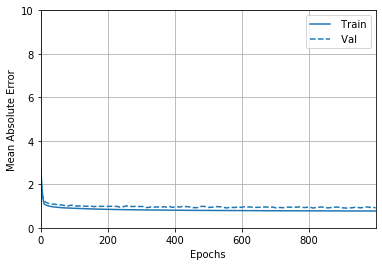

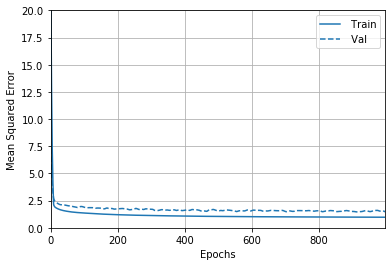

In [23]:
model.show_history()

## Model Validation

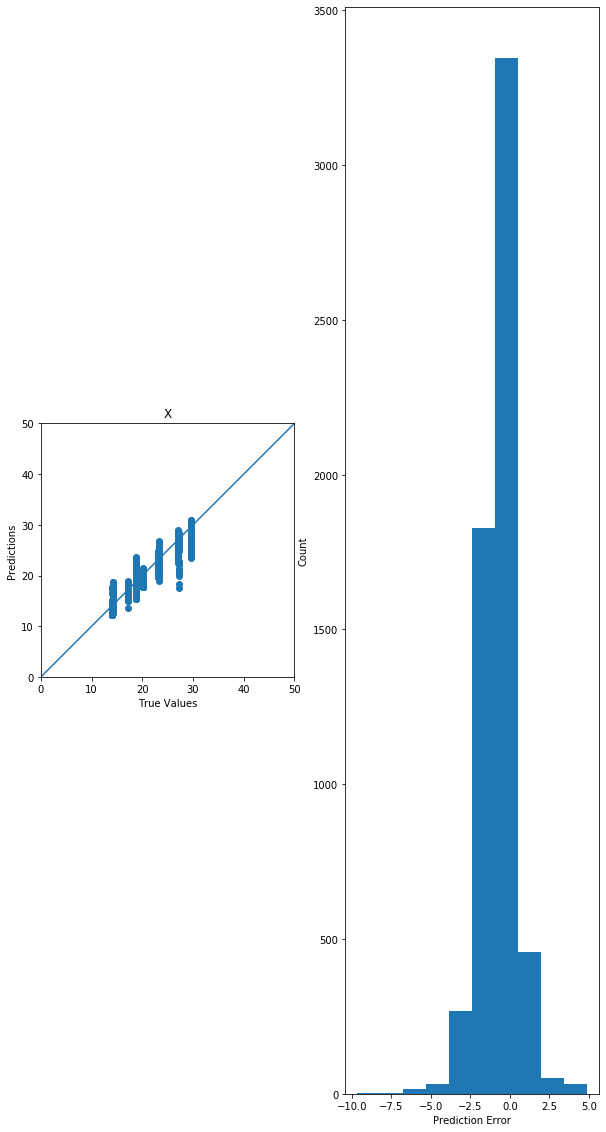

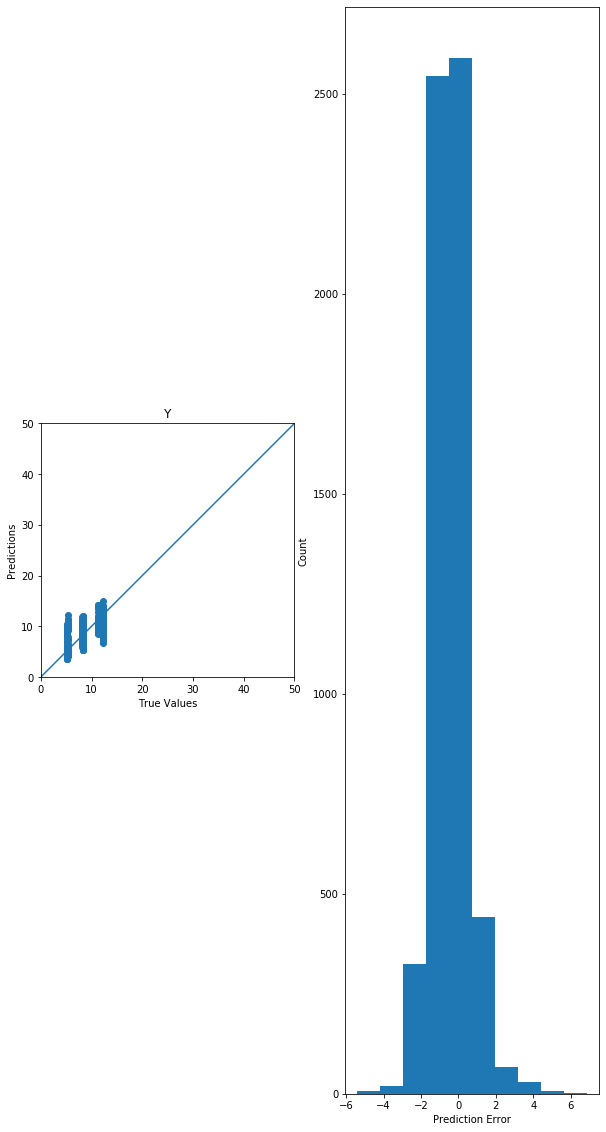

In [24]:
model.model_validation(X_validation, y_validation)

## Model Testing

In [25]:
model.model_testing(X_test, y_test)

6035/1 - 0s - loss: 16.2625 - mae: 0.8929 - mse: 1.5117
Test loss: 12.577598065468726
Mean absolute error: 0.8928766
Mean squared error: 1.5117496


## Plotting Learning Curves

In [26]:
train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train_rolled.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test_rolled.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
    train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

    validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
    validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

    test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
    test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

    X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
    X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

    model = MLP()

    history = model.fit(X_train, y_train, X_validation, y_validation)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
Train on 1810 samples, validate on 603 samples
Epoch 1/1000
1810/1810 [==============================] - 1s 300us/sample - loss: 175.6457 - mae: 10.8118 - mse: 174.1802 - val_loss: 88.1896 - val_mae: 6.8443 - val_mse: 84.3382
Epoch 2/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 41.0364 - mae: 4.3075 - mse: 32.2252 - val_loss: 45.1540 - val_mae: 4.6355 

1810/1810 [==============================] - 0s 33us/sample - loss: 12.6604 - mae: 0.9817 - mse: 1.8022 - val_loss: 17.1253 - val_mae: 1.8269 - val_mse: 5.9484
Epoch 44/1000
1810/1810 [==============================] - 0s 34us/sample - loss: 12.6366 - mae: 0.9772 - mse: 1.7666 - val_loss: 16.9513 - val_mae: 1.9191 - val_mse: 6.4285
Epoch 45/1000
1810/1810 [==============================] - 0s 35us/sample - loss: 12.6243 - mae: 0.9787 - mse: 1.7796 - val_loss: 16.8639 - val_mae: 1.8204 - val_mse: 5.7673
Epoch 46/1000
1810/1810 [==============================] - 0s 36us/sample - loss: 12.5951 - mae: 0.9662 - mse: 1.7356 - val_loss: 16.6988 - val_mae: 1.8268 - val_mse: 5.8181
Epoch 47/1000
1810/1810 [==============================] - 0s 32us/sample - loss: 12.5957 - mae: 0.9655 - mse: 1.7308 - val_loss: 16.5982 - val_mae: 1.8648 - val_mse: 5.9438
Epoch 48/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.5710 - mae: 0.9613 - mse: 1.7158 - val_loss: 16.7259 - val_

1810/1810 [==============================] - 0s 33us/sample - loss: 12.1826 - mae: 0.8362 - mse: 1.3005 - val_loss: 16.6033 - val_mae: 1.6670 - val_mse: 4.9411
Epoch 91/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.1994 - mae: 0.8472 - mse: 1.3244 - val_loss: 17.0299 - val_mae: 1.6879 - val_mse: 5.0961
Epoch 92/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.1893 - mae: 0.8350 - mse: 1.2993 - val_loss: 16.3989 - val_mae: 1.6701 - val_mse: 4.9363
Epoch 93/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.1870 - mae: 0.8403 - mse: 1.3107 - val_loss: 16.2942 - val_mae: 1.7198 - val_mse: 5.1463
Epoch 94/1000
1810/1810 [==============================] - 0s 36us/sample - loss: 12.1883 - mae: 0.8437 - mse: 1.3088 - val_loss: 16.5135 - val_mae: 1.7158 - val_mse: 5.1647
Epoch 95/1000
1810/1810 [==============================] - 0s 36us/sample - loss: 12.1560 - mae: 0.8296 - mse: 1.2731 - val_loss: 16.3541 - val_

Epoch 137/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.9888 - mae: 0.7835 - mse: 1.1193 - val_loss: 16.2293 - val_mae: 1.7197 - val_mse: 5.0755
Epoch 138/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.0022 - mae: 0.7846 - mse: 1.1283 - val_loss: 16.1143 - val_mae: 1.7267 - val_mse: 5.0837
Epoch 139/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.9900 - mae: 0.7802 - mse: 1.1213 - val_loss: 16.0009 - val_mae: 1.7552 - val_mse: 5.2062
Epoch 140/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 12.0016 - mae: 0.7921 - mse: 1.1357 - val_loss: 16.1016 - val_mae: 1.7299 - val_mse: 5.1093
Epoch 141/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.9895 - mae: 0.7836 - mse: 1.1212 - val_loss: 16.3238 - val_mae: 1.6744 - val_mse: 4.9414
Epoch 142/1000
1810/1810 [==============================] - 0s 35us/sample - loss: 11.9848 - mae: 0.7814 - mse: 1.1111 - val_

Epoch 184/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.8967 - mae: 0.7564 - mse: 1.0425 - val_loss: 16.0548 - val_mae: 1.7125 - val_mse: 5.0128
Epoch 185/1000
1810/1810 [==============================] - 0s 35us/sample - loss: 11.8621 - mae: 0.7438 - mse: 0.9987 - val_loss: 15.9960 - val_mae: 1.7969 - val_mse: 5.4309
Epoch 186/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.8747 - mae: 0.7481 - mse: 1.0185 - val_loss: 16.3036 - val_mae: 1.6937 - val_mse: 4.9796
Epoch 187/1000
1810/1810 [==============================] - 0s 32us/sample - loss: 11.8816 - mae: 0.7491 - mse: 1.0181 - val_loss: 16.6712 - val_mae: 1.6627 - val_mse: 4.9416
Epoch 188/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.8737 - mae: 0.7445 - mse: 1.0065 - val_loss: 16.0385 - val_mae: 1.7147 - val_mse: 5.0169
Epoch 189/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.8650 - mae: 0.7456 - mse: 1.0004 - val_

Epoch 231/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.7844 - mae: 0.7180 - mse: 0.9320 - val_loss: 16.0059 - val_mae: 1.7261 - val_mse: 5.1067
Epoch 232/1000
1810/1810 [==============================] - 0s 33us/sample - loss: 11.7819 - mae: 0.7181 - mse: 0.9294 - val_loss: 16.2731 - val_mae: 1.7290 - val_mse: 5.1159
Epoch 233/1000
1810/1810 [==============================] - 0s 34us/sample - loss: 11.8116 - mae: 0.7248 - mse: 0.9576 - val_loss: 16.1147 - val_mae: 1.7513 - val_mse: 5.2027
Epoch 234/1000
1810/1810 [==============================] - 0s 42us/sample - loss: 11.7772 - mae: 0.7163 - mse: 0.9212 - val_loss: 16.0627 - val_mae: 1.7814 - val_mse: 5.3713
Epoch 235/1000
1810/1810 [==============================] - 0s 37us/sample - loss: 11.7870 - mae: 0.7160 - mse: 0.9353 - val_loss: 16.0614 - val_mae: 1.7515 - val_mse: 5.2233
Epoch 236/1000
1810/1810 [==============================] - 0s 34us/sample - loss: 11.7844 - mae: 0.7221 - mse: 0.9360 - val_

3620/3620 [==============================] - 0s 33us/sample - loss: 12.8713 - mae: 1.1065 - mse: 2.0849 - val_loss: 16.7447 - val_mae: 1.8202 - val_mse: 6.4212
Epoch 19/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 12.8629 - mae: 1.0995 - mse: 2.0695 - val_loss: 16.9307 - val_mae: 1.8610 - val_mse: 6.6623
Epoch 20/1000
3620/3620 [==============================] - 0s 34us/sample - loss: 12.8179 - mae: 1.0864 - mse: 2.0204 - val_loss: 17.5626 - val_mae: 2.0484 - val_mse: 7.5670
Epoch 21/1000
3620/3620 [==============================] - 0s 34us/sample - loss: 12.7875 - mae: 1.0807 - mse: 1.9894 - val_loss: 16.8652 - val_mae: 1.8363 - val_mse: 6.4316
Epoch 22/1000
3620/3620 [==============================] - 0s 43us/sample - loss: 12.7797 - mae: 1.0751 - mse: 1.9800 - val_loss: 17.6710 - val_mae: 2.1910 - val_mse: 8.3148
Epoch 23/1000
3620/3620 [==============================] - 0s 37us/sample - loss: 12.7508 - mae: 1.0672 - mse: 1.9647 - val_loss: 16.8118 - val_

3620/3620 [==============================] - 0s 35us/sample - loss: 12.0889 - mae: 0.8469 - mse: 1.2547 - val_loss: 16.2063 - val_mae: 1.6988 - val_mse: 5.8152
Epoch 66/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 12.0735 - mae: 0.8386 - mse: 1.2317 - val_loss: 16.1660 - val_mae: 1.6159 - val_mse: 5.4352
Epoch 67/1000
3620/3620 [==============================] - 0s 36us/sample - loss: 12.0732 - mae: 0.8384 - mse: 1.2330 - val_loss: 16.6506 - val_mae: 1.8988 - val_mse: 6.8023
Epoch 68/1000
3620/3620 [==============================] - 0s 32us/sample - loss: 12.0511 - mae: 0.8346 - mse: 1.2120 - val_loss: 16.5456 - val_mae: 1.7811 - val_mse: 6.3423
Epoch 69/1000
3620/3620 [==============================] - 0s 34us/sample - loss: 12.0606 - mae: 0.8336 - mse: 1.2239 - val_loss: 16.2280 - val_mae: 1.7048 - val_mse: 5.8948
Epoch 70/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 12.0412 - mae: 0.8272 - mse: 1.2036 - val_loss: 16.4318 - val_

3620/3620 [==============================] - 0s 31us/sample - loss: 11.8407 - mae: 0.7652 - mse: 1.0188 - val_loss: 16.0620 - val_mae: 1.6942 - val_mse: 5.6747
Epoch 113/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.8406 - mae: 0.7627 - mse: 1.0088 - val_loss: 16.0485 - val_mae: 1.6794 - val_mse: 5.6146
Epoch 114/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.8385 - mae: 0.7580 - mse: 1.0043 - val_loss: 16.0903 - val_mae: 1.6083 - val_mse: 5.2070
Epoch 115/1000
3620/3620 [==============================] - 0s 40us/sample - loss: 11.8246 - mae: 0.7565 - mse: 0.9893 - val_loss: 16.8300 - val_mae: 2.0420 - val_mse: 7.2930
Epoch 116/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 11.8205 - mae: 0.7587 - mse: 0.9877 - val_loss: 16.7460 - val_mae: 1.9954 - val_mse: 7.0684
Epoch 117/1000
3620/3620 [==============================] - 0s 32us/sample - loss: 11.8198 - mae: 0.7574 - mse: 0.9926 - val_loss: 16.2230 -

Epoch 159/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 11.7070 - mae: 0.7190 - mse: 0.8843 - val_loss: 16.0104 - val_mae: 1.7960 - val_mse: 6.0173
Epoch 160/1000
3620/3620 [==============================] - 0s 35us/sample - loss: 11.7044 - mae: 0.7196 - mse: 0.8827 - val_loss: 16.0837 - val_mae: 1.8178 - val_mse: 6.1782
Epoch 161/1000
3620/3620 [==============================] - 0s 32us/sample - loss: 11.6992 - mae: 0.7191 - mse: 0.8807 - val_loss: 15.8181 - val_mae: 1.5374 - val_mse: 4.9496
Epoch 162/1000
3620/3620 [==============================] - 0s 33us/sample - loss: 11.6974 - mae: 0.7157 - mse: 0.8710 - val_loss: 16.2295 - val_mae: 1.8631 - val_mse: 6.3444
Epoch 163/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.6988 - mae: 0.7186 - mse: 0.8795 - val_loss: 16.3603 - val_mae: 1.9342 - val_mse: 6.7530
Epoch 164/1000
3620/3620 [==============================] - 0s 32us/sample - loss: 11.6997 - mae: 0.7201 - mse: 0.8823 - val_

Epoch 206/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.6325 - mae: 0.6982 - mse: 0.8215 - val_loss: 15.8861 - val_mae: 1.7651 - val_mse: 5.8764
Epoch 207/1000
3620/3620 [==============================] - 0s 32us/sample - loss: 11.6265 - mae: 0.6963 - mse: 0.8162 - val_loss: 16.3280 - val_mae: 1.9520 - val_mse: 6.7614
Epoch 208/1000
3620/3620 [==============================] - 0s 35us/sample - loss: 11.6309 - mae: 0.6953 - mse: 0.8195 - val_loss: 15.7443 - val_mae: 1.6141 - val_mse: 5.3071
Epoch 209/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.6283 - mae: 0.6931 - mse: 0.8164 - val_loss: 15.7469 - val_mae: 1.7003 - val_mse: 5.6031
Epoch 210/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.6273 - mae: 0.6938 - mse: 0.8169 - val_loss: 15.7502 - val_mae: 1.6017 - val_mse: 5.1278
Epoch 211/1000
3620/3620 [==============================] - 0s 30us/sample - loss: 11.6284 - mae: 0.6927 - mse: 0.8128 - val_

Epoch 253/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5791 - mae: 0.6826 - mse: 0.7758 - val_loss: 15.6685 - val_mae: 1.5286 - val_mse: 4.9564
Epoch 254/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5874 - mae: 0.6801 - mse: 0.7794 - val_loss: 15.6913 - val_mae: 1.6047 - val_mse: 5.2654
Epoch 255/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5839 - mae: 0.6829 - mse: 0.7773 - val_loss: 16.4787 - val_mae: 1.9987 - val_mse: 7.0458
Epoch 256/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5711 - mae: 0.6823 - mse: 0.7736 - val_loss: 16.0428 - val_mae: 1.8426 - val_mse: 6.1913
Epoch 257/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5860 - mae: 0.6847 - mse: 0.7847 - val_loss: 16.0463 - val_mae: 1.8704 - val_mse: 6.3191
Epoch 258/1000
3620/3620 [==============================] - 0s 31us/sample - loss: 11.5757 - mae: 0.6808 - mse: 0.7728 - val_

5430/5430 [==============================] - 0s 32us/sample - loss: 13.9641 - mae: 1.4481 - mse: 3.2434 - val_loss: 16.0052 - val_mae: 1.7092 - val_mse: 5.4381
Epoch 5/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 13.2680 - mae: 1.2531 - mse: 2.4885 - val_loss: 15.6084 - val_mae: 1.5910 - val_mse: 4.8398
Epoch 6/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 13.0930 - mae: 1.1921 - mse: 2.2816 - val_loss: 15.7356 - val_mae: 1.7570 - val_mse: 5.6210
Epoch 7/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 13.0096 - mae: 1.1639 - mse: 2.1958 - val_loss: 15.5746 - val_mae: 1.6314 - val_mse: 5.0598
Epoch 8/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 12.9420 - mae: 1.1380 - mse: 2.1214 - val_loss: 15.3293 - val_mae: 1.5349 - val_mse: 4.5701
Epoch 9/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 12.8939 - mae: 1.1224 - mse: 2.0663 - val_loss: 15.1094 - val_mae: 

5430/5430 [==============================] - 0s 30us/sample - loss: 11.9579 - mae: 0.7939 - mse: 1.0851 - val_loss: 14.0517 - val_mae: 1.4087 - val_mse: 3.7192
Epoch 52/1000
5430/5430 [==============================] - 0s 32us/sample - loss: 11.9490 - mae: 0.7939 - mse: 1.0801 - val_loss: 14.0031 - val_mae: 1.3473 - val_mse: 3.5028
Epoch 53/1000
5430/5430 [==============================] - 0s 31us/sample - loss: 11.9407 - mae: 0.7912 - mse: 1.0682 - val_loss: 14.1254 - val_mae: 1.3974 - val_mse: 3.7234
Epoch 54/1000
5430/5430 [==============================] - 0s 31us/sample - loss: 11.9397 - mae: 0.7882 - mse: 1.0708 - val_loss: 14.1704 - val_mae: 1.1792 - val_mse: 2.9834
Epoch 55/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 11.9286 - mae: 0.7870 - mse: 1.0538 - val_loss: 14.2448 - val_mae: 1.2331 - val_mse: 3.1741
Epoch 56/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 11.9206 - mae: 0.7836 - mse: 1.0493 - val_loss: 14.1347 - val_

5430/5430 [==============================] - 0s 30us/sample - loss: 11.7308 - mae: 0.7223 - mse: 0.8667 - val_loss: 14.2335 - val_mae: 1.3378 - val_mse: 3.6053
Epoch 99/1000
5430/5430 [==============================] - 0s 30us/sample - loss: 11.7246 - mae: 0.7209 - mse: 0.8584 - val_loss: 14.2815 - val_mae: 1.4915 - val_mse: 4.0860
Epoch 100/1000
5430/5430 [==============================] - 0s 31us/sample - loss: 11.7185 - mae: 0.7201 - mse: 0.8556 - val_loss: 14.1921 - val_mae: 1.3723 - val_mse: 3.7015
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1152      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total p

7240/7240 [==============================] - 0s 57us/sample - loss: 12.0167 - mae: 0.8160 - mse: 1.1842 - val_loss: 13.8024 - val_mae: 1.0809 - val_mse: 2.4003
Epoch 41/1000
7240/7240 [==============================] - 0s 39us/sample - loss: 12.0108 - mae: 0.8157 - mse: 1.1807 - val_loss: 14.0640 - val_mae: 1.0001 - val_mse: 2.1519
Epoch 42/1000
7240/7240 [==============================] - 0s 33us/sample - loss: 12.0080 - mae: 0.8113 - mse: 1.1744 - val_loss: 13.3935 - val_mae: 1.1251 - val_mse: 2.5359
Epoch 43/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 12.0001 - mae: 0.8092 - mse: 1.1722 - val_loss: 13.2871 - val_mae: 1.0747 - val_mse: 2.3340
Epoch 44/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.9839 - mae: 0.8047 - mse: 1.1543 - val_loss: 13.2486 - val_mae: 1.1331 - val_mse: 2.5309
Epoch 45/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.9805 - mae: 0.8032 - mse: 1.1515 - val_loss: 13.8504 - val_

7240/7240 [==============================] - 0s 33us/sample - loss: 11.7655 - mae: 0.7405 - mse: 0.9462 - val_loss: 13.0159 - val_mae: 0.9837 - val_mse: 2.0419
Epoch 88/1000
7240/7240 [==============================] - 0s 66us/sample - loss: 11.7642 - mae: 0.7388 - mse: 0.9464 - val_loss: 13.0058 - val_mae: 1.0825 - val_mse: 2.3085
Epoch 89/1000
7240/7240 [==============================] - 0s 35us/sample - loss: 11.7556 - mae: 0.7378 - mse: 0.9388 - val_loss: 13.1131 - val_mae: 0.9325 - val_mse: 1.9087
Epoch 90/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.7530 - mae: 0.7358 - mse: 0.9327 - val_loss: 13.1494 - val_mae: 0.9596 - val_mse: 1.9891
Epoch 91/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.7463 - mae: 0.7326 - mse: 0.9280 - val_loss: 12.9338 - val_mae: 1.0407 - val_mse: 2.1333
Epoch 92/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.7527 - mae: 0.7365 - mse: 0.9353 - val_loss: 13.0772 - val_

Epoch 134/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.6387 - mae: 0.6950 - mse: 0.8240 - val_loss: 13.3121 - val_mae: 0.9229 - val_mse: 1.8775
Epoch 135/1000
7240/7240 [==============================] - 0s 35us/sample - loss: 11.6361 - mae: 0.6968 - mse: 0.8229 - val_loss: 13.0003 - val_mae: 0.9526 - val_mse: 1.9039
Epoch 136/1000
7240/7240 [==============================] - 0s 35us/sample - loss: 11.6353 - mae: 0.6968 - mse: 0.8226 - val_loss: 12.9751 - val_mae: 0.9964 - val_mse: 1.9845
Epoch 137/1000
7240/7240 [==============================] - 0s 34us/sample - loss: 11.6330 - mae: 0.6957 - mse: 0.8193 - val_loss: 12.8931 - val_mae: 1.1001 - val_mse: 2.2719
Epoch 138/1000
7240/7240 [==============================] - 0s 35us/sample - loss: 11.6321 - mae: 0.6949 - mse: 0.8211 - val_loss: 13.2590 - val_mae: 0.8830 - val_mse: 1.7782
Epoch 139/1000
7240/7240 [==============================] - 0s 35us/sample - loss: 11.6266 - mae: 0.6929 - mse: 0.8137 - val_

KeyboardInterrupt: 

In [ ]:
x = np.arange(10)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()

In [27]:
model.save('../Models/Small_MLP_Regression_Rolling_FFill_MinMax.h5')